<a href="https://colab.research.google.com/github/pharringtonp19/presidential-policies/blob/main/notebooks/immigration/share_of_labor_force.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import datetime as dt
from google.colab import userdata
from matplotlib import font_manager
import matplotlib.dates as mdates
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import rcParams
rcParams['image.interpolation'] = 'nearest'
rcParams['image.cmap'] = 'viridis'
rcParams['axes.grid'] = False
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [16]:
start, end = dt.datetime(2008, 1, 1), dt.datetime(2025, 6, 30)

# 1) Download monthly NSA levels from FRED
fb = web.DataReader("LNU01073395", "fred", start, end)      # Foreign-born labor force level
tot = web.DataReader("LNU01000000", "fred", start, end)       # Total civilian labor force level

# 2) Align and compute monthly share
df = pd.concat([fb.rename(columns={"LNU01073395":"fb"}),
                tot.rename(columns={"LNU01000000":"total"})], axis=1).dropna()
df["share"] = df["fb"] / df["total"] *100

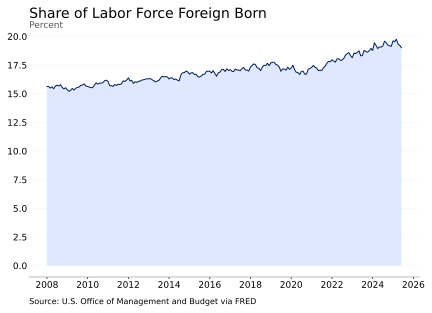

In [18]:
x, y = df.index, df['share']

# --- NYT-style colors ---
line_color     = "#001f4d"  # deep navy (main line)
fill_color     = "#ccd9ff"  # very light blue fill
forecast_fill  = "#99b3ff"  # medium-light navy/blue for forecast shading
grid_color     = "#f0f4ff"  # almost white with a blue tint for grid

fig, ax = plt.subplots(figsize=(7, 4.5), dpi=300)
ax.set_facecolor("white")
fig.patch.set_facecolor("white")

# area + line
ax.fill_between(x, 0, y, color=fill_color, linewidth=0, zorder=1, alpha=0.6)
ax.yaxis.grid(True, color=grid_color, linewidth=.5, zorder=2)
ax.plot(x, y, color=line_color, linewidth=1, zorder=3,
        solid_capstyle="round", solid_joinstyle="round")

# spines & ticks (keep only a subtle bottom spine)
for side in ("top", "left", "right"):
    ax.spines[side].set_visible(False)
ax.spines["bottom"].set_color("#bdbdbd")
ax.spines["bottom"].set_linewidth(1)

ax.tick_params(axis="x", length=2, labelsize=9, pad=2)
ax.tick_params(axis="y", length=0, labelsize=9, pad=2)

# tidy limits
ax.set_axisbelow(True)            # any future gridlines stay behind

# title + subtitle (left-aligned)
ax.text(0., 1.04, s='Share of Labor Force Foreign Born', transform=ax.transAxes, size=14)
ax.text(0, 1.00, "Percent", transform=ax.transAxes,
        fontsize=9, color="#555555")

ax.annotate("Source: U.S. Office of Management and Budget via FRED",
        xy = (0., -0.1),
        xycoords='axes fraction',
        ha='left',
        va="center",
        fontsize=8)

fig.savefig("share_labor_force.png", bbox_inches="tight", dpi=300)
plt.show()